# For booking pitch dataset:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Booking pitches.csv", index_col=0)
df.describe()

,grade,charges,day,number of person,Average Age,Parking,Electricity,Music,Extra facilities
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000
mean,1.35000,973.250000,4.050000,13.700000,20.750000,0.65000,28.850000,0.450000,0.35000
std,0.48936,535.671431,2.584875,5.341989,4.799945,0.48936,12.376867,0.510418,0.48936
min,1.00000,135.000000,1.000000,3.000000,15.000000,0.00000,12.000000,0.000000,0.00000
25%,1.00000,477.750000,1.000000,10.000000,16.000000,0.00000,22.500000,0.000000,0.00000
50%,1.00000,986.000000,4.500000,14.500000,19.500000,1.00000,25.000000,0.000000,0.00000
75%,2.00000,1307.250000,7.000000,18.000000,25.000000,1.00000,35.000000,1.000000,1.00000
max,2.00000,1947.000000,7.000000,22.000000,29.000000,1.00000,65.000000,1.000000,1.00000


In [20]:
df = df.replace(['Cricket','hockey','Football','rugby'],[1,2,3,4])
df.head(5)

,type of sport,grade,charges,day,number of person,Average Age,Parking,Electricity,Music,Extra facilities
pitches,,,,,,,,,,
A,3,1,1947,1,22,28,1,20,1,1
C,4,1,973,2,16,18,1,25,0,0
D,1,2,135,5,10,15,0,65,0,0
A,3,1,1690,1,20,28,1,23,1,1
C,4,1,846,6,13,18,1,24,0,0


In [21]:
corln = df.corr()['charges']
print(corln)

type of sport       0.496953
grade              -0.847640
charges             1.000000
day                -0.116437
number of person    0.938404
Average Age         0.944498
Parking             0.847640
Electricity        -0.148078
Music               0.832305
Extra facilities    0.789314
Name: charges, dtype: float64


# Plots using Matplot library

Text(0.5,1,'Histogram of Price distribution')

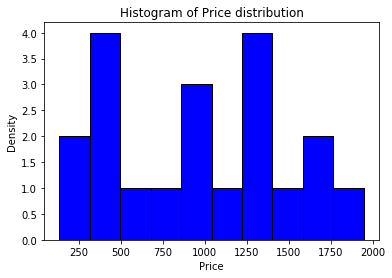

In [22]:
price=df['charges']
plt.hist(price,color='blue',edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Histogram of Price distribution")

Days are presented as 1 to 7 from sunday to saturday

Text(0.5,1,'Price distribution during different days')

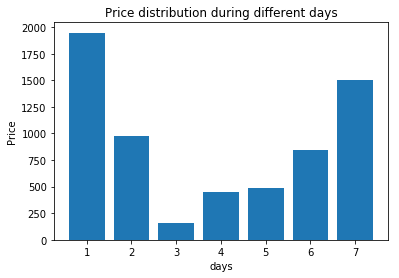

In [23]:
#plt.bar(df['grade'],price)
plt.bar(df['day'],price)
plt.ylabel("Price")
plt.xlabel("days")
plt.title("Price distribution during different days")

Text(0.5,1,'Price distribution for different Aged groups')

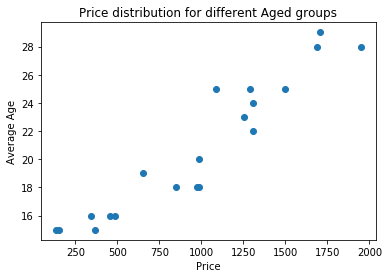

In [24]:
plt.scatter(price,df['Average Age'])
plt.xlabel("Price")
plt.ylabel("Average Age")
plt.title("Price distribution for different Aged groups")

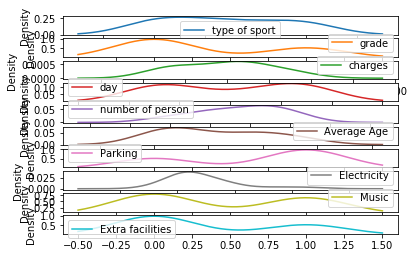

In [25]:
df.plot(kind='density', subplots=True,sharex=False, sharey = False)
plt.show()

pitches
A    1710.000000
B    1248.600000
C     889.000000
D     322.833333
Name: charges, dtype: float64


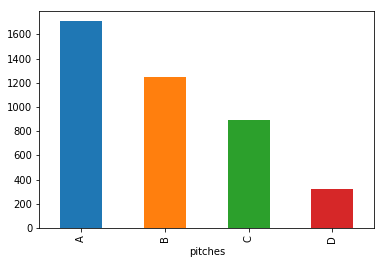

In [26]:
pitches = df.groupby(['pitches']).mean()['charges']
print (pitches)
pitches.plot.bar()

# Visualization Using Seaborn Library:


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


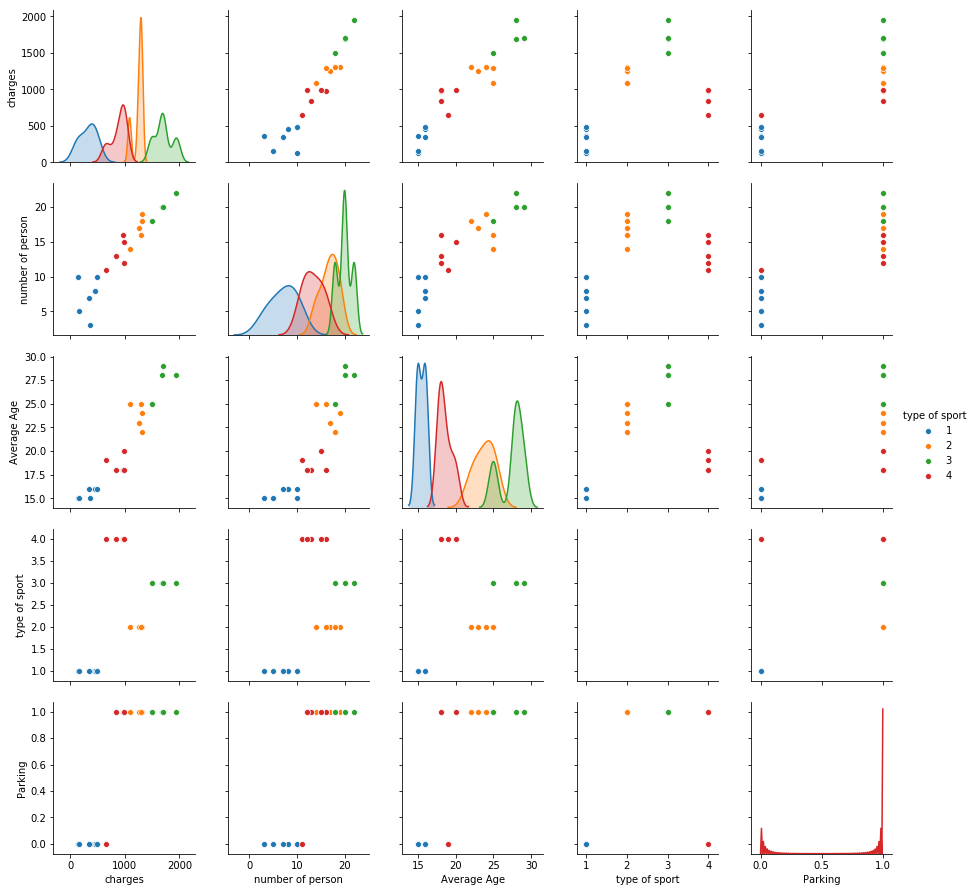

In [27]:
data = df[['charges','number of person','Average Age','type of sport','Parking']]
sns.pairplot(data, hue='type of sport' ,size=2.5)

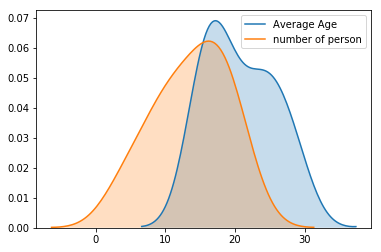

In [28]:
for col in data[['Average Age','number of person']]:
    sns.kdeplot(data[col],shade=True)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


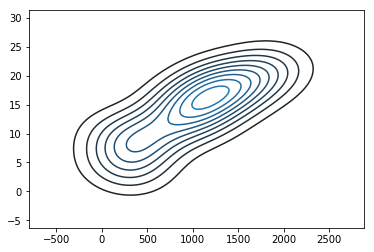

In [29]:
sns.kdeplot(data);

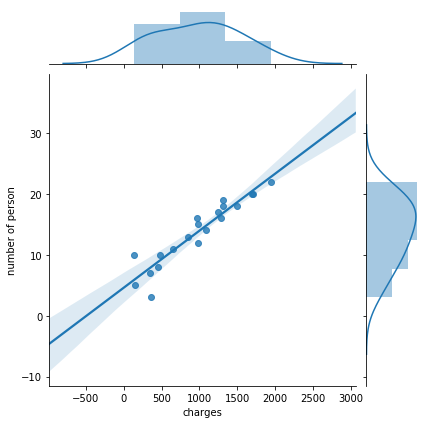

In [30]:
sns.jointplot("charges", "number of person", data, kind='reg')

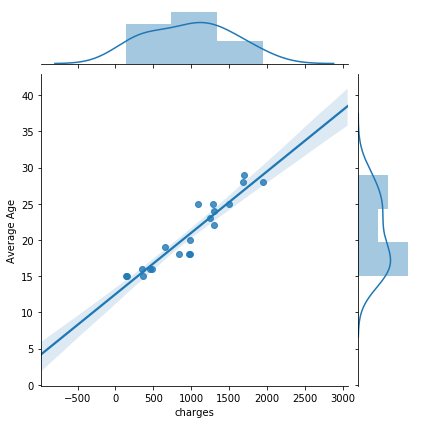

In [31]:
sns.jointplot("charges", "Average Age", data, kind='reg')

These are the few possible visualizations from the dummy dataset.
and just from the visualizations , it can be conclude that Pitch "A" has the highest price and pitches were booked during sundays and saturdays most, number of persons visiting w.r.t prices charging shows the growing improvement of platform.
PS:All are just assumptions to deal with dummy data.

# For same sport dataset:5 Cities coded as 1 to 5: 

In [236]:
ppl = pd.read_csv("Samesport.csv")
ppl.describe()
ppl.head(5)

,people,sport,city
0,a,cricket,1
1,s,hockey,4
2,d,football,2
3,f,rugby,2
4,g,football,5


In [237]:
ppl = ppl.replace(['cricket','hockey','football','rugby'],[1,2,3,4])
ppl.head(5)
ppl.groupby('city').count()


,people,sport
city,,
1,5,5
2,11,11
3,11,11
4,7,7
5,6,6


In [238]:
groups = ppl.groupby(['sport', 'city'])
for name, group in groups:
        print(name)
        #print(group)


(1, 1)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 2)
(3, 3)
(3, 5)
(4, 2)
(4, 4)
(4, 5)


In [239]:
import numpy as np
groups.aggregate(np.sum)

people
sport city         
1     1     aqwd8j8
      3        jvp8
      4         hzi
2     3      nef4j5
      4          sp
3     2     dmyu2t3
      3       krtb6
      5      gla7r2
4     2     fxcuom9
      4        y3e6
      5         ba8

In [240]:
counts = ppl.groupby(['sport', 'city'],as_index=False).count()
print (counts)

    sport  city  people
0       1     1       5
1       1     3       3
2       1     4       3
3       2     3       4
4       2     4       2
5       3     2       5
6       3     3       4
7       3     5       4
8       4     2       6
9       4     4       2
10      4     5       2


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_di

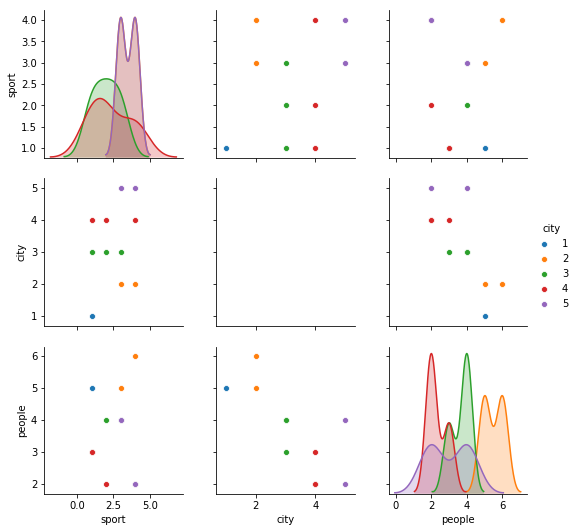

In [241]:
sns.pairplot(counts,hue='city',size=2.5)

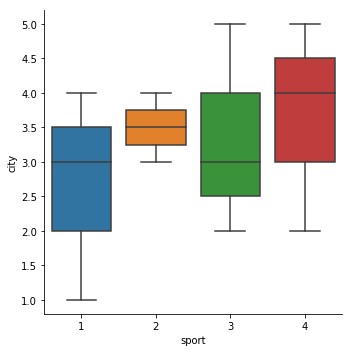

In [242]:
sns.catplot(x='sport',y='city',kind="box", data=counts)

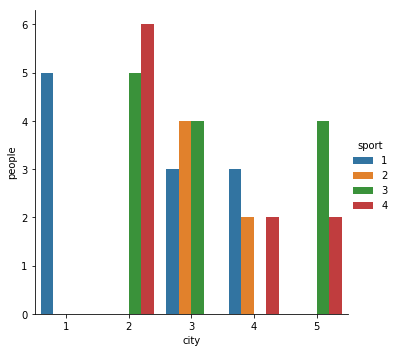

In [244]:
sns.catplot(x='city',y='people',hue='sport',kind='bar', data=counts)

From the graph, it is clearly statable that how many people belongs to what sport in the same cities.

# Equipment dataset:

In [251]:
edf = pd.read_csv("equipment.csv")
edf.describe()
import seaborn as sns
edf.head(5)

,months,sport,equipment,money
0,1,1,30,3000.0
1,1,2,20,2000.0
2,1,3,15,1500.0
3,2,2,22,2200.0
4,2,3,16,1600.0


In [252]:
edf.describe()

,months,sport,equipment,money
count,36.00000,36.000000,36.000000,36.000000
mean,6.50000,2.083333,22.361111,2236.111111
std,3.50102,0.806226,5.329984,532.998407
min,1.00000,1.000000,15.000000,1500.000000
25%,3.75000,1.000000,17.750000,1775.000000
50%,6.50000,2.000000,22.000000,2200.000000
75%,9.25000,3.000000,28.000000,2800.000000
max,12.00000,3.000000,32.000000,3200.000000


In [253]:
corln = edf.corr()['sport']
print(corln)

months       0.136652
sport        1.000000
equipment   -0.957995
money       -0.957995
Name: sport, dtype: float64


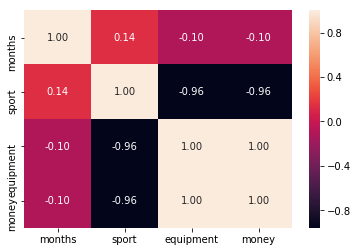

In [254]:
sns.heatmap(edf.corr(),annot= True, fmt=".2f")
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


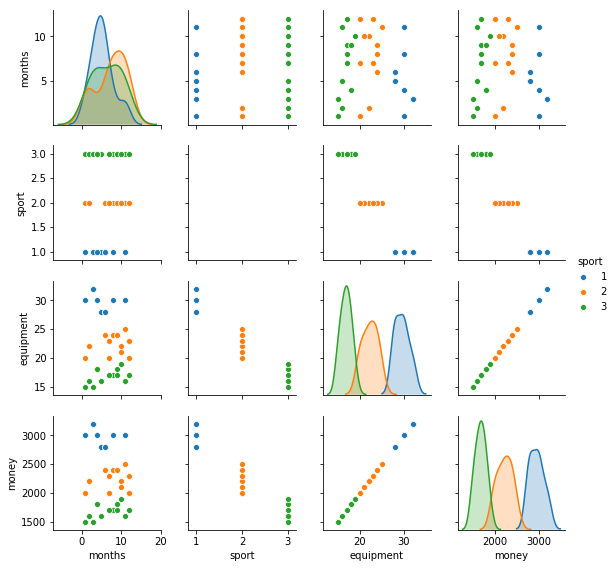

In [278]:
sns.pairplot(edf,hue='sport' ,size=2)

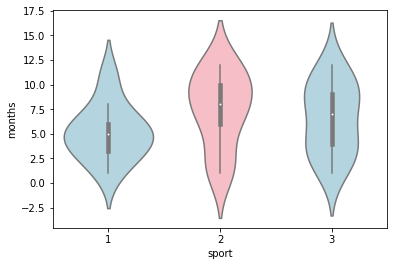

In [270]:
sns.violinplot("sport","months",data=edf,palette=["lightblue", "lightpink"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

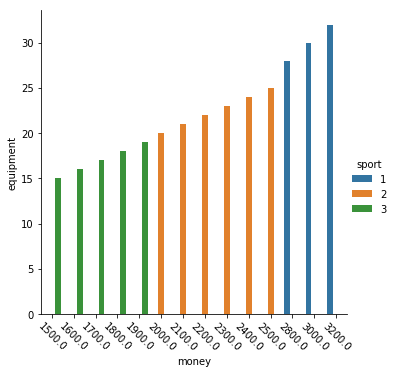

In [290]:
sns.catplot(x="money",y="equipment", hue="sport", kind="bar", data=edf)
plt.xticks(rotation=-45)

Thus, from the few graphs it can be conclude that Sport 1 require's more equipements which indeed cost heigh and was the sport for which the pitch was also booking more often.
P.S: based on dummy numbers assumptions.